In [87]:
import pandas as pd
import matplotlib


def open_file(path: str) -> pd.DataFrame:
    return pd.DataFrame(pd.read_csv(path))

def generate_EMA(data_file: list) -> float:
    val = 0
    period = len(data_file)
    alpha = 1 - 2 / (period + 1)
    for day in range(0, period):
        val += (alpha ** day) * data_file[day]
    return val / ((1 - alpha ** period) / (1 - alpha))


def generate_MACD(data_file):
    data_file.insert(len(data_file.columns), "MACD", None)
    for idx in range(len(data_file), 26, -1):
        data_file.loc[idx, "MACD"] = generate_EMA((data_file.loc[idx - 12:idx-1, "open"].tolist())[::-1]) - \
                                     generate_EMA((data_file.loc[idx - 26:idx-1, "open"].tolist())[::-1])


def generate_SIGNAL(data_file):
    data_file.insert(len(data_file.columns), "SIGNAL", None)
    for idx in range(len(data_file), 35, -1):
        data_file.loc[idx, "SIGNAL"] = generate_EMA(data_file.loc[idx - 9:idx - 1, "MACD"].tolist()[::-1])


def organiser(path: str):
    data = open_file(path)
    data = data.loc[0:200]
    generate_MACD(data)
    generate_SIGNAL(data)
    draw_plot(data.loc[36:])
    print(find_cut(data.loc[:, "SIGNAL"].tolist(), data.loc[:, "MACD"].tolist()))

def draw_plot(data):
    data.plot(x="date", y=["MACD", "SIGNAL"], title="SIGNAL/MACD")

[[53, False], [62, True], [66, False], [71, True], [74, False], [86, True], [91, False], [94, True], [104, False], [112, True], [128, False], [145, True], [165, False], [189, True], [200, False]]


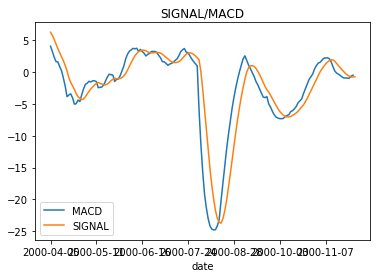

In [90]:

organiser("data/INTC.csv")


In [89]:
def find_cut(signals: list, macd: list):
    cuts = []
    for idx in range(1, len(signals)):
        if signals[idx-1] is not None and macd[idx-1] is not None:
            if bool(signals[idx-1] > macd[idx-1]) != bool(signals[idx] > macd[idx]):
                cuts.append([idx, bool(signals[idx] > macd[idx])])
    return cuts